In [72]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [73]:
df = pd.read_csv("考虑疫情csv.csv")

In [74]:
import datetime as dt


tt = []
for i in df["统计日期"]:
    a = dt.datetime.strptime(i,'%Y/%m/%d')
    b = dt.datetime.strftime(a,'%Y-%m-%d')
    tt.append(b)
df['date'] = tt

In [75]:
df['date'] = pd.to_datetime(df['date'])  # 将日期列转换为Datetime类型
df.set_index('date', inplace=True)

In [76]:
df

,统计日期,第一页面人数
date,,
2023-01-01,2023/1/1,7082202
2023-01-02,2023/1/2,7350403
2023-01-03,2023/1/3,7910150
2023-01-04,2023/1/4,7941681
2023-01-05,2023/1/5,8001464
...,...,...
2023-09-07,2023/9/7,6932239
2023-09-08,2023/9/8,7087825
2023-09-09,2023/9/9,6681899


In [77]:
import math

# 读取 CSV 文件
def read_cvs(file):
    content = pd.read_csv(file)
    # data = np.array(content)
    col_2 = content["Count"]
    data = np.array(col_2)
    # print(data)
    return data

# 计算 [n, m] 区间内的 count 的平均值
def avergae_n_m(data, n, m):
    sum = 0;
    for i in range(m - n):
        sum += data[i + n]
    return round(sum / (m - n))

# 一次移动平均
def one_moving_average(data, N):
    # 第一个参数是表格数据，第二个参数是 N 跨度的取值
    if N > len(data):
        return "N 的取值大于数据的数量"
    # 定义 M 来记录预测计算结果
    M = []
    for i in range(len(data) - N):
        m = avergae_n_m(data, i, i + N)
        M.append(m)
    # 预测值
    M.append(avergae_n_m(data, len(data) - N, len(data)))
    # print("预测值为：", avergae_n_m(data, len(data) - N, len(data)))
    # print(M)
    # standard_deviation(data, M, N)
    return M

# 一次移动平均 计算标准差
def standard_deviation(data, M, N):
    # 第一个参数是表格数据，第二个是预测计算的数据，第三个是 N 跨度的取值
    sum = 0
    for i in range(len(M) - 1):
        sum += (pow(M[i] - data[i + N], 2))
    # print("standard_deviation")
    S = int(math.sqrt((sum) / (len(M) - 1)))
    print("N 为",N ,"时，标准差为：", S)


# 二次移动平均
def two_moving_average(data, N):
    M1 = one_moving_average(data, N)
    M2 = one_moving_average(M1, N)
    # print(M1)
    # print(M2)
    # 计算 T
    T = 1
    # print("T:", T)
    # 计算 a
    a = 2 * M1[len(M1) - 1] - M2[len(M2) - 1]
    # 计算 b
    b = (2 / (N - 1)) * (M1[len(M1) - 1] - M2[len(M2) - 1])
    print("a:", a, "b:", b)

    # 计算 X （预测值）
    X = a + b * T
    print("N 为", N, "时，二次移动平均法预测值:", X)
    # print("two_moving_average")

# 一次指数平滑法
def one_exponential_smoothing(data, a):
    # 第一个参数是表格数据，第二个参数是 a 分析加权系数
    S = []
    # 初始值的计算 s
    if len(data) > 50:
        s = round(data[0], 1)
    elif len(data) < 3:
        s = round(data[0], 1)
    else:
        s = round((data[0] + data[1] + data[2]) / 3, 1)
    # s = round(1145.0, 1)
    S.append(s)

    # s_flag 用于记录上一个计算结果
    s_flag = s

    # print(S)
    for i in range(len(data)):
        s_now = round(a * data[i] + (1 - a) * s_flag, 1)
        s_flag = s_now
        S.append(s_now)
    # print(S)
    # print("one_exponential_smoothing")
    # print("a 为", a, "时，一次指数平滑法预测值:", S[len(S) - 1])
    return S

# 二次指数平滑法
def two_exponential_smoothing(data, a):
    M1 = one_exponential_smoothing(data, a)
    M2 = one_exponential_smoothing(M1, a)
    # print(M1)
    # print(M2)

    # 计算 a
    A = round(2 * M1[len(M1) - 1] - M2[len(M2) - 1], 1)
    # 计算 b
    b = round((a / (1 - a)) * (M1[len(M1) - 1] - M2[len(M2) - 1]), 1)
    print("a:", A, "b:", b)

    # 计算 T
    T = 1
    # print("T:", T)

    # 计算 X （预测值）
    X = A + b * T
    print("a 为", a, "时，二次指数平滑法预测值:", X)

    # print("two_exponential_smoothing")

#if __name__ == '__main__':
    # 读取数据
    #data = read_cvs("train.csv")
    # print(data)
    # data = [35, 38, 33, 34, 38, 40]
    # data = [533.8, 574.6, 606.9, 649.8, 705.1, 772.0, 816.4, 892.7, 963.9, 1015.1, 1102.7]
    # data = [128, 132, 140, 157, 210, 318, 325, 276, 210, 154, 137, 125]

    # data = [10, 15, 8, 20, 10, 16, 18, 20, 22, 24, 20, 26, 27, 29, 29]
    # data = [5.25, 3.46, 2.67, 3.25, 4.70, 5.46, 5.18, 2.14, 4.23, 4.62, 1.57, 4.69]
    # data = [1344, 1650, 1951, 1641, 1515, 1982, 2519, 2818, 2937, 3142, 3093, 3500, 3497, 3944, 4416]

    # 一次移动平均法
    # for i in range(2,20):
    #     one_moving_average(data, i)

    # one_moving_average(data, 4)

    # 二次移动平均法
    #for i in range(2,7):
        #two_moving_average(data, i)

    # 一次指数平滑法
    # for i in range(1, 10):
    #     a = i / 10
    #     one_exponential_smoothing(data, a)

    # 二次指数平滑法
    # for i in range(1, 10):
    #     a = i / 10
    #     two_exponential_smoothing(data, a)
        # print(a)

## 移动平均

In [78]:
import numpy as np

def moving_average(data, window_size):
    """
    计算移动平均值

    参数:
    data (list或numpy数组): 输入时间序列数据
    window_size (int): 移动窗口的大小

    返回:
    list: 移动平均值序列
    """
    moving_averages = []
    
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        average = np.mean(window)
        moving_averages.append(average)
    
    return moving_averages

# 示例数据
data = df['第一页面人数']

# 设置移动窗口大小
window_size = 7

# 计算移动平均值
averages = moving_average(data, window_size)

# 输出移动平均值
print("移动平均值序列:", averages[:30])

移动平均值序列: [7647395.857142857, 7664124.714285715, 7677677.714285715, 7612333.0, 7544552.285714285, 7491650.714285715, 7478258.142857143, 7488507.285714285, 7513306.571428572, 7470807.142857143, 7374683.0, 7227490.428571428, 6992423.857142857, 6669556.857142857, 6215586.142857143, 6032961.714285715, 6046640.857142857, 6220300.0, 6580120.428571428, 7147461.714285715, 7848608.571428572, 8719568.857142856, 9260136.142857144, 9577352.857142856, 9730026.142857144, 9702927.857142856, 9493648.42857143, 9209271.285714285, 8876696.42857143, 8598671.714285715]


## 二次和三次指数平滑并进行时间序列预测

In [79]:
data = df['第一页面人数']

In [80]:
import numpy as np

# 一次指数平滑法
def one_exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]  # 初始值等于第一个数据点
    for t in range(1, len(data)):
        smoothed_data.append(alpha * data[t] + (1 - alpha) * smoothed_data[t - 1])
    return smoothed_data

# 二次指数平滑法
def two_exponential_smoothing(data, alpha, beta, n_forecast):
    m = len(data)
    # 计算一次平滑
    level1 = one_exponential_smoothing(data, alpha)
    
    # 计算二次平滑
    level2 = one_exponential_smoothing(level1, alpha)
    trend = [beta * (level1[t] - level2[t]) + (1 - beta) * (level2[t - 1] if t > 0 else 0) for t in range(m)]
    
    # 预测未来n_forecast个时间点的值
    forecast = []
    for t in range(m, m + n_forecast):
        forecast.append(level1[-1] + (t - m + 1) * trend[-1])
    
    return forecast

# 示例数据（替换为您的数据）
data = data

# 一次指数平滑参数
alpha = 0.2

# 二次指数平滑参数
beta = 0.1

# 预测未来30天的值
n_forecast = 30

forecast = two_exponential_smoothing(data, alpha, beta, n_forecast)

print("二次指数平滑法预测未来{}天的值:".format(n_forecast))
print(forecast)


二次指数平滑法预测未来30天的值:
[13584380.836433824, 20113409.78015525, 26642438.723876674, 33171467.667598102, 39700496.611319534, 46229525.555040956, 52758554.498762384, 59287583.44248381, 65816612.38620524, 72345641.32992667, 78874670.2736481, 85403699.21736951, 91932728.16109094, 98461757.10481237, 104990786.0485338, 111519814.99225523, 118048843.93597665, 124577872.87969808, 131106901.82341951, 137635930.76714092, 144164959.71086234, 150693988.65458378, 157223017.5983052, 163752046.5420266, 170281075.48574805, 176810104.42946947, 183339133.3731909, 189868162.31691232, 196397191.26063377, 202926220.20435518]


未来30个时间点的预测值:
2023-09-12    7.296469e+06
2023-09-13    7.187524e+06
2023-09-14    6.941961e+06
2023-09-15    6.769429e+06
2023-09-16    6.536958e+06
2023-09-17    6.197641e+06
2023-09-18    5.804786e+06
2023-09-19    5.790697e+06
2023-09-20    5.936291e+06
2023-09-21    6.122110e+06
2023-09-22    6.449825e+06
2023-09-23    6.709358e+06
2023-09-24    6.764382e+06
2023-09-25    6.655436e+06
2023-09-26    6.409873e+06
2023-09-27    6.237341e+06
2023-09-28    6.004870e+06
2023-09-29    5.665554e+06
2023-09-30    5.272698e+06
2023-10-01    5.258609e+06
2023-10-02    5.404203e+06
2023-10-03    5.590023e+06
2023-10-04    5.917738e+06
2023-10-05    6.177270e+06
2023-10-06    6.232294e+06
2023-10-07    6.123349e+06
2023-10-08    5.877786e+06
2023-10-09    5.705254e+06
2023-10-10    5.472783e+06
2023-10-11    5.133466e+06
Freq: D, dtype: float64


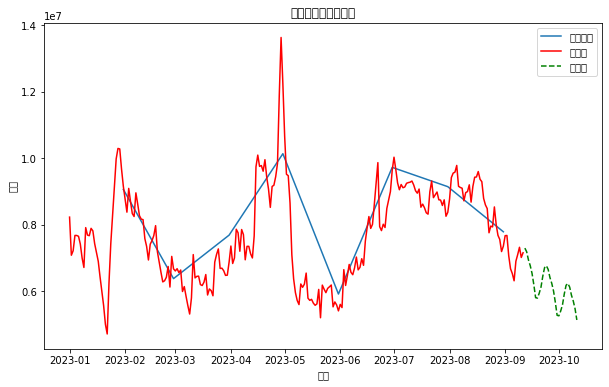

In [81]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 三次指数平滑
exponential_smoothing = sm.tsa.ExponentialSmoothing(data, trend='add', seasonal='add', seasonal_periods=12)
model = exponential_smoothing.fit()

# 预测未来时间点的值
forecast_periods = 30  # 预测未来30个时间点
forecast = model.forecast(steps=forecast_periods)

# 打印预测结果
print("未来{}个时间点的预测值:".format(forecast_periods))
print(forecast)

# 可视化原始数据和预测结果
plt.figure(figsize=(10, 6))
plt.plot(ts, label='原始数据')
plt.plot(model.fittedvalues, label='拟合值', color='red')
plt.plot(forecast, label='预测值', linestyle='--', color='green')
plt.legend()
plt.title('三次指数平滑和预测')
plt.xlabel('时间')
plt.ylabel('数值')
plt.show()